In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from category_encoders.woe import WOEEncoder

ModuleNotFoundError: No module named 'category_encoders'

# Ładowanie i podział zbioru danych

In [2]:
dataset = pd.read_csv("../data/bank-full.csv")
dataset.shape

(45211, 17)

In [3]:
build, val = train_test_split(dataset, test_size=0.3,random_state=42)
train, test = train_test_split(build, test_size=0.3, random_state=42)

In [5]:
train.to_csv("../preprocessed_data/train.csv",index=False)
test.to_csv("../preprocessed_data/test.csv",index=False)
val.to_csv("../preprocessed_data/val.csv",index=False)

In [4]:
df = train.copy()
df.shape

(22152, 17)

# Eksploracyjna analiza danych

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28440,26,admin.,single,secondary,no,94,no,no,cellular,29,jan,171,1,-1,0,unknown,no
18510,50,services,married,secondary,yes,0,no,no,telephone,31,jul,35,9,-1,0,unknown,no
10722,56,entrepreneur,married,secondary,no,535,yes,yes,unknown,16,jun,345,4,-1,0,unknown,no
42957,58,technician,married,secondary,no,7554,no,no,telephone,9,feb,167,1,469,1,success,no
26987,31,blue-collar,single,secondary,no,23,no,no,cellular,21,nov,116,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22152 entries, 28440 to 36613
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        22152 non-null  int64 
 1   job        22152 non-null  object
 2   marital    22152 non-null  object
 3   education  22152 non-null  object
 4   default    22152 non-null  object
 5   balance    22152 non-null  int64 
 6   housing    22152 non-null  object
 7   loan       22152 non-null  object
 8   contact    22152 non-null  object
 9   day        22152 non-null  int64 
 10  month      22152 non-null  object
 11  duration   22152 non-null  int64 
 12  campaign   22152 non-null  int64 
 13  pdays      22152 non-null  int64 
 14  previous   22152 non-null  int64 
 15  poutcome   22152 non-null  object
 16  y          22152 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.0+ MB


Brak wartości null, kolumny zarówno numeryczne jak i kategoryczne

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000
mean,40.950433,1347.177095,15.863714,257.111547,2.767606,40.539410,0.586087
std,10.583563,2911.428365,8.311830,256.093527,3.123506,101.040739,2.600391
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.250000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


In [8]:
df['y'] = np.where(df.y == 'yes', 1, 0)

## Age

Wiek klienta

In [9]:
df.age.describe()

count    22152.000000
mean        40.950433
std         10.583563
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Jak widzimy, wartości są prawdopodobne - min = 18 i max = 95. Z tego powodu nie przewiduje żadnych outlierów.

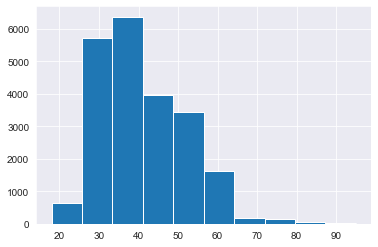

In [10]:
df.age.hist()
plt.show()

## Job

Rodzaj zatrudnienia klienta

In [11]:
df.job.value_counts()

blue-collar      4782
management       4597
technician       3716
admin.           2518
services         2093
retired          1118
self-employed     782
entrepreneur      711
unemployed        618
housemaid         616
student           467
unknown           134
Name: job, dtype: int64

In [12]:
df.groupby('job')['y'].agg(['mean','count']).sort_values('mean',ascending = False)

,mean,count
job,,
student,0.295503,467
retired,0.220930,1118
unemployed,0.169903,618
management,0.139656,4597
admin.,0.117554,2518
self-employed,0.113811,782
technician,0.108719,3716
housemaid,0.100649,616
services,0.091257,2093


In [13]:
job_encoded = WOEEncoder().fit_transform(df.job, df.y)
job_encoded.join(df.y).groupby('job')['y'].agg(['mean','count']).sort_values('mean',ascending = False)

,mean,count
job,,
1.149671,0.295503,467
0.756929,0.220930,1118
0.435505,0.169903,618
0.197445,0.139656,4597
0.001409,0.117554,2518
-0.028373,0.113811,782
-0.087433,0.108719,3716
-0.161544,0.100649,616
-0.279402,0.091257,2093


## Martial

Stan cywilny klienta

In [14]:
df.marital.value_counts()

married     13399
single       6228
divorced     2525
Name: marital, dtype: int64

## Education

Wykształcenie klienta

In [15]:
df.education.value_counts()

secondary    11449
tertiary      6405
primary       3356
unknown        942
Name: education, dtype: int64

In [16]:
df.groupby('education')['y'].agg(['mean','count']).sort_values('mean',ascending = False)

,mean,count
education,,
tertiary,0.153786,6405
unknown,0.129512,942
secondary,0.105773,11449
primary,0.085816,3356


## Default

Czy klient ma zaległy kredyt

In [17]:
df.default.value_counts()

no     21707
yes      445
Name: default, dtype: int64

## Balance

Roczny bilans klienta w euro

In [18]:
df.balance.describe()

count    22152.000000
mean      1347.177095
std       2911.428365
min      -6847.000000
25%         68.000000
50%        447.000000
75%       1431.250000
max      81204.000000
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance', ylabel='Count'>

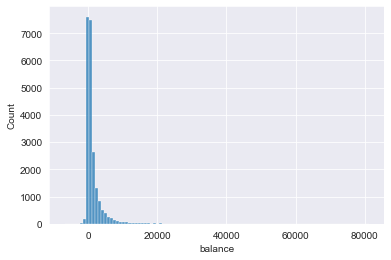

In [19]:
sns.histplot(df.balance, bins=100)

Bardzo lewoskośny rozkład.

## Housing

Czy klient ma kredyt mieszkaniowy

In [20]:
df.housing.value_counts()

yes    12305
no      9847
Name: housing, dtype: int64

In [21]:
df.groupby('housing')['y'].agg(['mean','count']).sort_values('mean',ascending = False)

,mean,count
housing,,
no,0.166954,9847
yes,0.078180,12305


## Loan

Czy klient ma pożyczkę osobistą

In [22]:
df.loan.value_counts()

no     18596
yes     3556
Name: loan, dtype: int64

In [23]:
df.groupby('loan')['y'].agg(['mean','count']).sort_values('mean',ascending = False)

,mean,count
loan,,
no,0.127017,18596
yes,0.068616,3556


## Contact

Rodzaj komunikacji z klientem

In [24]:
df.contact.value_counts()

cellular     14413
unknown       6334
telephone     1405
Name: contact, dtype: int64

## Day

Dzień miesiąca, w którym nastąpił ostatni kontakt z klientem

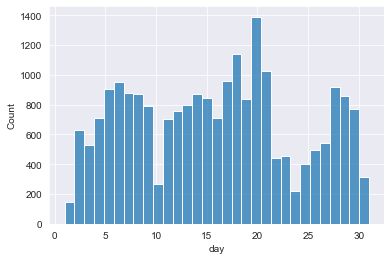

In [25]:
sns.histplot(df.day, bins=31)
plt.show()

Obserwujemy zmniejszoną aktywność 1., 10. i 24. dnia każdego miesiąca i intrygujący peak 20. dnia miesiąca.

## Month

Miesiąc, w którym nastąpił ostatni kontakt z klientem

In [26]:
df.month.value_counts()

may    6678
jul    3382
aug    3018
jun    2635
nov    1961
apr    1457
feb    1324
jan     695
oct     370
sep     284
mar     236
dec     112
Name: month, dtype: int64

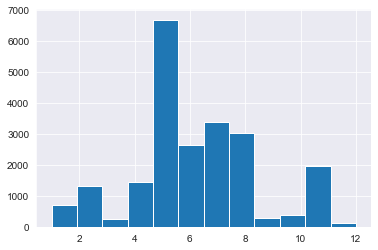

In [27]:
df.replace({"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}).month.hist(bins=12)
plt.show()

Widzimy nasilenie w miesiącach wiosennych i letnich - duży peak w maju, rzadziej jesienią i zimą (z wyjątkiem października)

In [28]:
df.groupby('month')['y'].agg(['mean','count']).sort_values('count',ascending = False)

,mean,count
month,,
may,0.068583,6678
jul,0.092844,3382
aug,0.110338,3018
jun,0.090702,2635
nov,0.109638,1961
apr,0.203157,1457
feb,0.154834,1324
jan,0.099281,695
oct,0.445946,370


In [29]:
month_encoded = WOEEncoder().fit_transform(df.month, df.y)
month_encoded.join(df.y).groupby('month')['y'].agg(['mean','count']).sort_values('mean',ascending = False)

,mean,count
month,,
2.031096,0.504237,236
2.000303,0.496479,284
1.873707,0.464286,112
1.798401,0.445946,370
0.650124,0.203157,1457
0.321082,0.154834,1324
-0.070378,0.110338,3018
-0.076088,0.109638,1961
-0.178162,0.099281,695


## Duration

Czas w sekundach ostatniego kontaktu z klientem

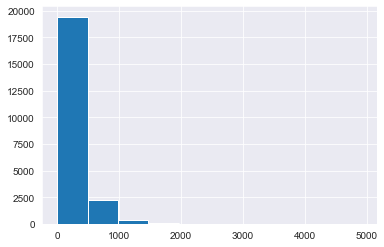

In [30]:
df.duration.hist()
plt.show()

Być może są obecne wartości odstające

In [31]:
df.duration.sort_values(ascending=False)

24148    4918
9947     3881
44602    3785
30747    3102
6451     3094
         ... 
2599        3
287         2
31740       1
22937       0
36425       0
Name: duration, Length: 22152, dtype: int64

Potraktujemy czas trwania połączenia powyżej 2000 sekund jako outlier, żeby nie psuło nam to za bardzo scalingu

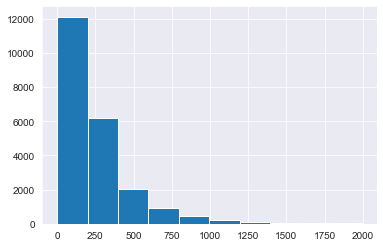

In [32]:
df[df.duration<2000].duration.hist()
plt.show()

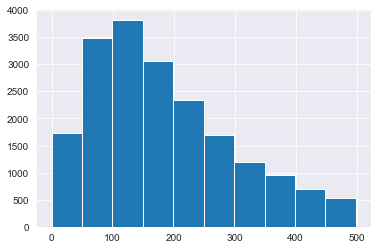

In [33]:
df[df.duration<500].duration.hist()
plt.show()

## Campaign

Liczba kontaktów z klientem w aktualnej kampanii (włączając ostatni kontakt)

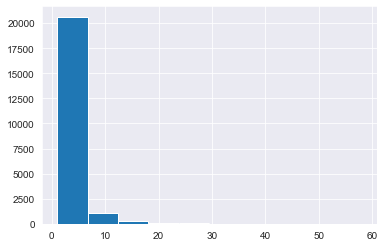

In [34]:
df.campaign.hist()
plt.show()

In [35]:
df.campaign.sort_values(ascending=False)

11914    58
18713    50
10697    46
18744    44
18660    43
         ..
41076     1
7604      1
27081     1
4386      1
36613     1
Name: campaign, Length: 22152, dtype: int64

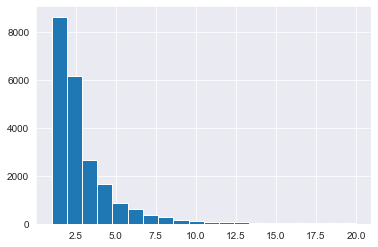

In [36]:
df[df.campaign<=20].campaign.hist(bins=20)
plt.show()

## Pdays

Liczba dni, które upłynęły od ostatniego kontaktu z klientem z poprzedniej kampanii (-1 oznacza brak kontaktu w poprzedniej kampanii)

In [37]:
df[df.pdays == -1].size/df.size

0.8158631274828458

Dla większośći klientów jest to pierwsza kampania, w której uczestniczą

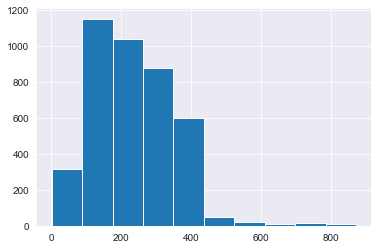

In [38]:
df[df.pdays != -1].pdays.hist()
plt.show()

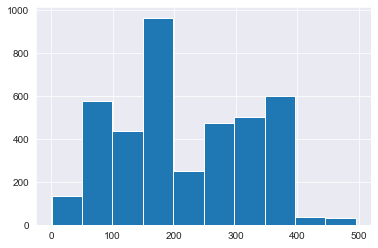

In [39]:
df[(df.pdays != -1) & (df.pdays < 500)].pdays.hist()
plt.show()

## Previous

Liczba kontaktów z klientem przed aktualną kampanią

In [40]:
df[df.previous == 0].size/df.size

0.8158631274828458

Analogicznie

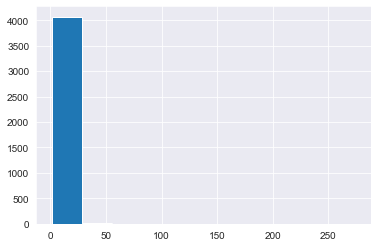

In [41]:
df[df.previous != 0].previous.hist()
plt.show()

Występują pewne outliery

In [42]:
df.previous.sort_values(ascending=False)

29182    275
44822     41
42611     40
37567     38
42422     37
        ... 
42237      0
6928       0
12723      0
23308      0
36613      0
Name: previous, Length: 22152, dtype: int64

No te 275 dość sporo

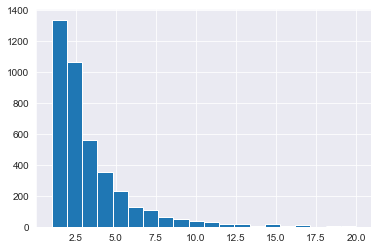

In [43]:
df[(df.previous != 0) & (df.previous <= 20)].previous.hist(bins=20)
plt.show()

## Poutcome

Rezultat poprzedniej kampanii

In [44]:
df.poutcome.value_counts()

unknown    18076
failure     2404
other        924
success      748
Name: poutcome, dtype: int64

In [45]:
df[df.poutcome == 'unknown'].size - df[df.previous == 0].size

51

Sporo nieznanych wartości, ale tylko w 24 przypadkach z innego powodu niż pierwszego udziału klienta w kampani. Spróbujemy z kodowaniem one hot encoding ale być może usuniemy tą zmienną

## Korelacja

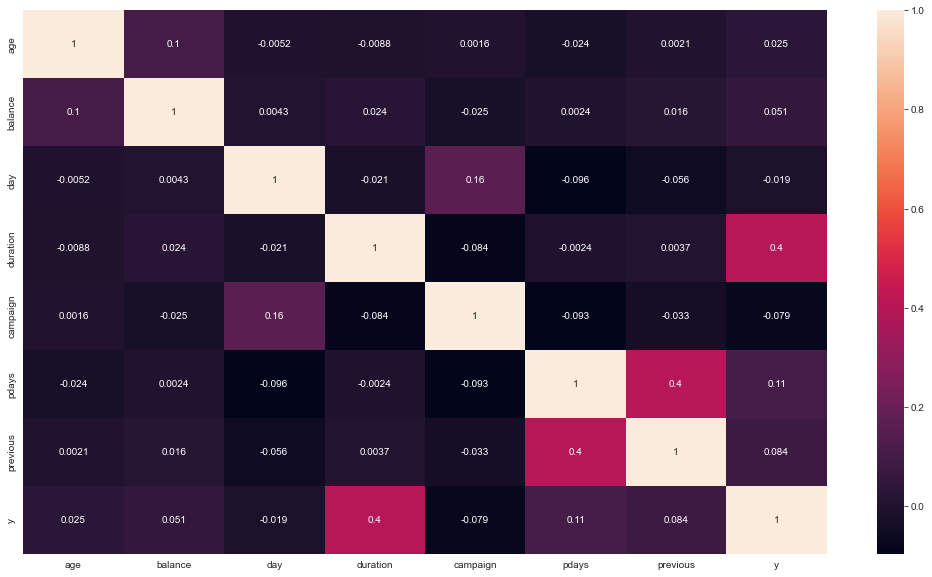

In [46]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.show()

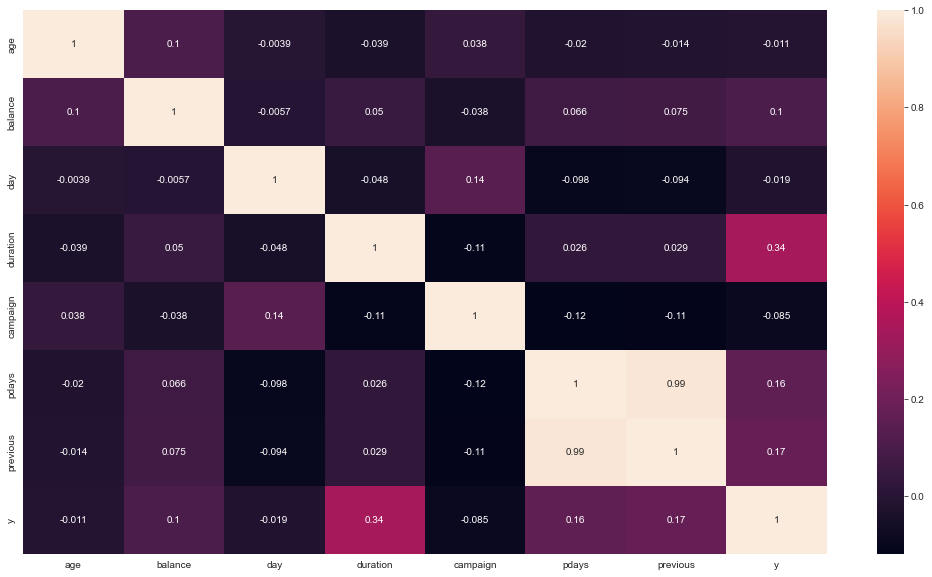

In [47]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(method='spearman'),annot=True)
plt.show()

Oczywista korelacja pomiędzy liczbą dni od ostatniego kontaktu z poprzedniej kampanii a liczbą kontaktów z poprzedniej kampanii. Zobaczmy jeszcze korelację zmiennych numerycznych z kategorycznymi

In [48]:
col_transformer = ColumnTransformer(
    transformers=[
        ('passthrough','passthrough', ['duration', 'campaign', 'pdays', 'previous', 'day']),
        ('cat', OneHotEncoder(sparse_output=False), ['contact', 'poutcome']),
    ])
encoding_pipeline = Pipeline([
    ('col_transformer', col_transformer)]).fit(df)

colnames = pd.Index(['duration', 'campaign', 'pdays', 'previous', 'IsFirstCampaign']).append(pd.Index(col_transformer.named_transformers_['cat'].get_feature_names_out(['contact', 'poutcome'])))

encoded_df = pd.DataFrame(encoding_pipeline.transform(df), columns=colnames)

<AxesSubplot:>

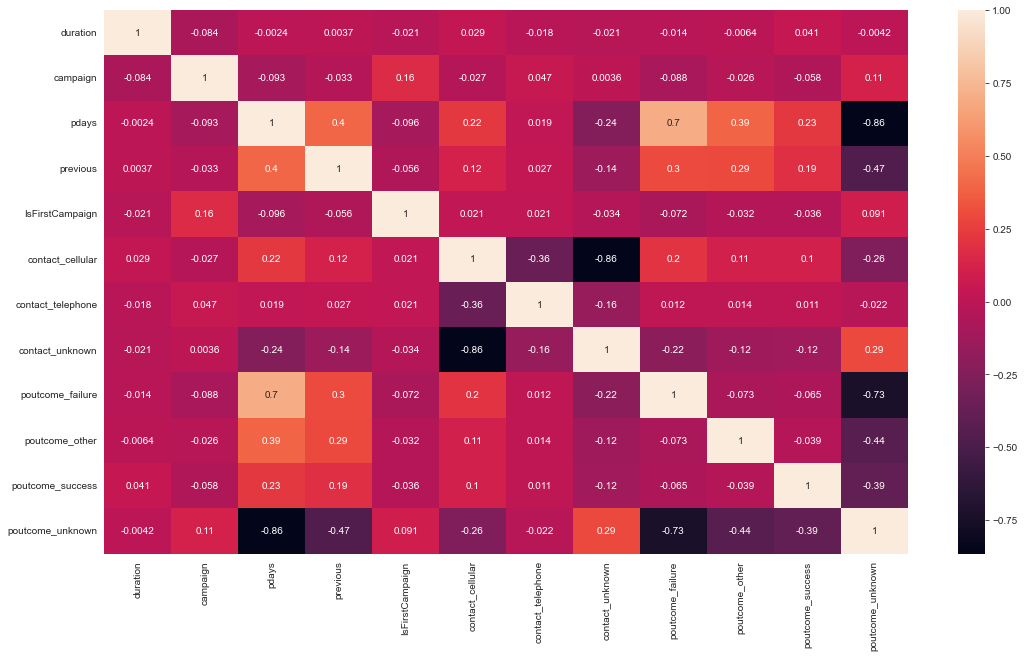

In [49]:
plt.figure(figsize=(18,10))
sns.heatmap(encoded_df.corr(method='pearson'),annot=True)
# plt.show()

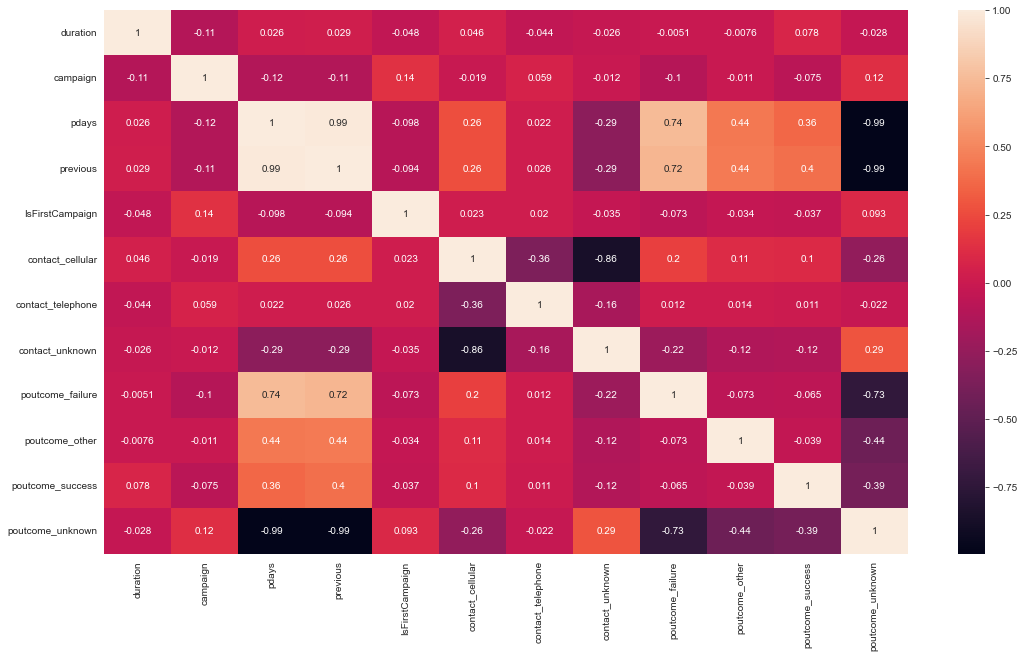

In [50]:
plt.figure(figsize=(18,10))
sns.heatmap(encoded_df.corr(method='spearman'),annot=True)
plt.show()

# Preprocessing

### Przetworzenie outlierów

Zamieniamy na medianę wartości, które na podstawie histogramów traktujemy jako otuliery

In [51]:
class OutlierTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.duration_median = None
        self.campaign_median = None
        self.previous_median = None

    def fit(self, data):
        self.duration_median = np.median(data["duration"])
        self.campaign_median = np.median(data["campaign"])
        self.previous_median = np.median(data["previous"])
        return self

    def transform(self, data):
        data.loc[data["duration"] > 2000, "duration"] = self.duration_median
        data.loc[data["campaign"] > 20, "campaign"] = self.campaign_median
        data.loc[data["previous"] > 20, "previous"] = self.previous_median
        return data

### Nowe zmienne

Tworzymy zmienną binarną is_first_campaign opisującą, czy aktualna kampania jest pierwszą dla klienta.

In [53]:
def add_features(data):
    data["is_first_campaign"] = np.where(data.previous == 0, 1, 0)
    return data

### Kodowanie binarne zmienych

Kodujemy zmienne default, housing, loan do postaci binarnej

In [54]:
def encode(data):
    data['loan'] = np.where(data.loan == 'yes', 1, 0)
    data['default'] = np.where(data.default == 'yes', 1, 0)
    data['housing'] = np.where(data.housing == 'yes', 1, 0)
    return data

### Kodowanie zmiennych kategorycznych metodą Weight of Evidence

Kodujemy zmienne job i month metodą WOE. Robimy to w dedykowanej klasie ponieważ metoda fit potrzebuje zmiennej y

In [ ]:
class WOE_Encoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.woe1 = WOEEncoder()
        self.woe2 = WOEEncoder()

    def fit(self, data):
        self.woe1.fit(data.job, data.y)
        self.woe2.fit(data.month, data.y)
        return self

    def transform(self, data):
        data['encoded_job'] = self.woe1.transform(data.job)
        data['encoded_month'] = self.woe2.transform(data.month)
        return data

### Kodowanie pozostałych zmiennych kategorycznych, standaryzacja i selekcja zmiennych

- Kodujemy zmienne education, martial, contact, month, poutcome za pomocą one hot encodingu
- Standaryzujemy zmienne age, balance, duration, campaign, pdays i previous
- Usuwamy zmienną day

# Pipeline

In [55]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28440,26,admin.,single,secondary,no,94,no,no,cellular,29,jan,171,1,-1,0,unknown,0
18510,50,services,married,secondary,yes,0,no,no,telephone,31,jul,35,9,-1,0,unknown,0
10722,56,entrepreneur,married,secondary,no,535,yes,yes,unknown,16,jun,345,4,-1,0,unknown,0
42957,58,technician,married,secondary,no,7554,no,no,telephone,9,feb,167,1,469,1,success,0
26987,31,blue-collar,single,secondary,no,23,no,no,cellular,21,nov,116,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32781,44,management,single,tertiary,no,1277,yes,no,cellular,17,apr,77,1,268,4,other,0
45037,45,management,single,tertiary,no,2048,yes,no,cellular,18,oct,310,1,804,1,failure,1
27786,37,management,married,tertiary,no,-76,yes,no,cellular,28,jan,230,1,204,1,other,0
10960,41,blue-collar,married,primary,no,402,no,no,unknown,17,jun,114,17,-1,0,unknown,0


In [56]:
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']),
        ('passthrough','passthrough', ['encoded_month', 'encoded_job', 'default', 'loan', 'housing', 'is_first_campaign']),
        ('one_hot', OneHotEncoder(sparse_output=False), ['education', 'marital', 'contact', 'poutcome']),
        ('drop', 'drop', ['day', 'y'])
    ])

pipeline = Pipeline([
    ('add_features', FunctionTransformer(add_features)),
    ('label_encoder', FunctionTransformer(encode)),
    ('outliers', OutlierTransformer()),
    ('woe', WOE_Encoder()),
    ('col_transformer', col_transformer)])

In [57]:
pipeline.fit(df)

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_features at 0x7fd018a82940>)),
                ('label_encoder',
                 FunctionTransformer(func=<function encode at 0x7fd018a82d30>)),
                ('outliers', OutlierTransformer()), ('woe', WOE_Encoder()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('passthrough', 'passthrough',
                                                  ['encoded_month',
                                                   'encoded_job', 'default',
                                                   'loan', 'housing',
                                                   'is_first_campaign']),
                                                 ('one_hot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['education', 'marital',
                                                   'contact', 'poutcome']),
                                                 ('drop', 'drop',
                                                  ['day', 'y'])]))])

In [58]:
colnames = pd.Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'month', 'job', 'default', 'loan', 'housing', 'is_first_campaign']).append(pd.Index(col_transformer.named_transformers_['one_hot'].get_feature_names_out(['education', 'marital', 'contact', 'poutcome'])))

In [59]:
preprocessed_train = pd.DataFrame(pipeline.transform(df), columns=colnames)
preprocessed_test = pd.DataFrame(pipeline.transform(test), columns=colnames)
preprocessed_val = pd.DataFrame(pipeline.transform(val), columns=colnames)

In [60]:
preprocessed_train

,age,balance,duration,campaign,pdays,previous,month,job,default,loan,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.412641,-0.430443,-0.345535,-0.656488,-0.411125,-0.335885,-0.178162,0.001409,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.855078,-0.462731,-0.912556,2.577611,-0.411125,-0.335885,-0.262245,-0.279402,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.422008,-0.278968,0.379918,0.556299,-0.411125,-0.335885,-0.287045,-0.337086,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.610984,2.131931,-0.362212,-0.656488,4.240569,0.274344,0.321082,-0.087433,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.940199,-0.454831,-0.574845,-0.656488,-0.411125,-0.335885,-0.076088,-0.494406,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22147,0.288148,-0.024105,-0.737446,-0.656488,2.251228,2.105032,0.650124,0.197445,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22148,0.382637,0.240720,0.233994,-0.656488,7.556139,0.274344,1.798401,0.197445,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
22149,-0.373270,-0.488835,-0.099548,-0.656488,1.617806,0.274344,-0.178162,0.197445,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22150,0.004683,-0.324651,-0.583183,5.811710,-0.411125,-0.335885,-0.287045,-0.494406,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
preprocessed_train.to_csv("../preprocessed_data/preprocessed_train.csv",index=False)
preprocessed_test.to_csv("../preprocessed_data/preprocessed_test.csv",index=False)
preprocessed_val.to_csv("../preprocessed_data/preprocessed_val.csv",index=False)